# import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import CSS4_COLORS
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Data set preparetion
1. read dataset
2. drop unnuessary library
3. create pivote table of library
4. to fill NaN value, use `bfill` fo fill up and get first value as first day
5. `interpolate` the other record

In [10]:
df = pd.read_csv("./kalimati_tarkari_dataset.csv",index_col="SN")
df.drop(columns=['Unit'],inplace=True)

dfp = pd.pivot(df,columns='Commodity',values='Average',index='Date')
first_day = dfp.bfill().iloc[0].to_dict()
dfp.iloc[0] = first_day
dfp = dfp.interpolate(method='linear',limit_direction='forward')
dfp.head()

Commodity,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Bakula,Bamboo Shoot,Banana,Barela,Bauhania flower,Bitter Gourd,...,Tomato Big(Nepali),Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-16,255.0,110.0,30.0,125.0,95.0,55.0,75.0,32.5,195.0,15.0,...,37.5,55.0,29.0,47.5,82.5,47.5,42.5,27.5,16.5,49.0
2013-06-17,255.0,120.0,30.0,125.0,95.0,55.0,75.0,32.5,195.0,18.0,...,27.5,55.0,22.5,47.5,82.5,47.5,47.5,27.5,15.0,49.0
2013-06-18,255.0,115.0,30.0,110.0,95.0,55.0,75.0,32.5,195.0,19.0,...,27.5,55.0,24.0,47.5,82.5,47.5,47.5,27.5,13.5,49.0
2013-06-19,255.0,115.0,30.0,112.5,95.0,55.0,75.0,32.5,195.0,22.5,...,27.5,55.0,26.0,47.5,82.5,47.5,47.5,27.5,15.0,49.0
2013-06-20,255.0,115.0,30.0,110.0,95.0,55.0,75.0,32.5,195.0,22.5,...,27.5,55.0,24.0,47.5,82.5,42.5,55.0,27.5,15.0,49.0


In [3]:
dfp.tail()

Commodity,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Bakula,Bamboo Shoot,Banana,Barela,Bauhania flower,Bitter Gourd,...,Tomato Big(Nepali),Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-09,255.0,283.75,55.0,900.0,95.0,95.0,105.0,75.0,275.0,13.5,...,46.0,15.0,12.5,17.5,17.5,75.0,75.0,30.0,42.5,75.0
2021-05-10,270.0,277.50,55.0,950.0,95.0,95.0,95.0,75.0,275.0,17.5,...,46.5,17.5,12.5,17.5,17.5,75.0,75.0,30.0,37.5,75.0
2021-05-11,265.0,271.25,55.0,1100.0,95.0,95.0,95.0,75.0,275.0,17.5,...,47.0,17.5,12.5,21.5,21.5,75.0,75.0,30.0,40.0,75.0
2021-05-12,262.5,265.00,55.0,1100.0,95.0,95.0,105.0,75.0,275.0,17.5,...,47.5,27.5,32.5,32.5,37.5,75.0,75.0,30.0,32.5,75.0
2021-05-13,260.0,265.00,55.0,1025.0,95.0,95.0,105.0,75.0,275.0,17.5,...,47.5,32.5,37.5,37.5,45.0,75.0,55.0,30.0,31.5,75.0


# Chose the columns
There are 132 Comandy and we can't plot this much so we need to select 10 of them  
create final df

In [4]:

cols = ['Sugarbeet', 'Chilli Green', 'Garlic Green', 'Drumstick', 'Coriander Green', 'Mushroom(Button)', 'Fish Fresh(Mungari)', 'Asparagus','Capsicum', 'Grapes(Green)']
print(len(cols))

final_df = dfp[cols]
final_df.head()


10


Commodity,Sugarbeet,Chilli Green,Garlic Green,Drumstick,Coriander Green,Mushroom(Button),Fish Fresh(Mungari),Asparagus,Capsicum,Grapes(Green)
Date,,,,,,,,,,
2013-06-16,37.5,35.0,47.5,37.5,100.0,325.0,235.0,125.0,57.5,255.0
2013-06-17,37.5,35.0,47.5,47.5,95.0,325.0,235.0,125.0,57.5,255.0
2013-06-18,37.5,37.5,47.5,37.5,95.0,325.0,235.0,110.0,57.5,255.0
2013-06-19,47.5,37.5,47.5,42.5,95.0,325.0,235.0,112.5,57.5,255.0
2013-06-20,37.5,45.0,42.5,47.5,55.0,325.0,235.0,110.0,52.5,255.0


We use `iterrows` to iterate rows,  
`row[0]` is date (index) value and `row[1]` is the `pandas Series` of the data  
`nlargest(10)` function to get most 10 expensive items.  
In set `update()` function to update set with multiple value, `add()` function is use to update single value

In [5]:

"""
n= 10
topn = {}
top_fruits = set()
for row in dfp.iterrows():
    topn[row[0]]=row[1].nlargest(n)
    top_fruits.update(list(row[1].nlargest(n).index))
print(top_fruits)
print(len(top_fruits))
top_fruits = list(top_fruits)
"""

'\nn= 10\ntopn = {}\ntop_fruits = set()\nfor row in dfp.iterrows():\n    topn[row[0]]=row[1].nlargest(n)\n    top_fruits.update(list(row[1].nlargest(n).index))\nprint(top_fruits)\nprint(len(top_fruits))\ntop_fruits = list(top_fruits)\n'

`CSS4_COLORS` is a dictionary of colors and
`np.random.shuffle` is use to shuffel the list and create list slicing

In [6]:
colors = list(CSS4_COLORS.values())
np.random.shuffle(colors)
color_values = colors[:len(cols)]
#fruit_color_dict = dict(zip(cols,color_values))
#print(fruit_color_dict)

# Add interval

`np.argsort([15,12,32,24])` will return `[1,0,3,2]` because   
value 12 at index 1 is smallest  
value 15 at index 0 is second smallest and so on

`np.searchsorted([15,12,32,24],[15,12,32,24],sorter=[1,0,3,2])` will return `[2,1,4,3]`

In [7]:
def ranker(arr:list)->list:
    """
    [10, 18, 7] => [2,3,1]
    """
    sorter = np.argsort(arr)
    return np.searchsorted(arr,arr,sorter=sorter)+1

`np.linspace([10,2],[20,10],num=3)` insert 1 values between two array of value  

 this will return `[[10,2],
[15,6],
[20,10]]`


`np.append(first_array, second_value, axis=0)` will concact two value.  
if we don't `axis = 0` it will return 1 dimention

In [17]:
step_size = 3

last_values = final_df.iloc[0].to_numpy()
plot_steps = np.array([last_values])

last_y = ranker(last_values)
y_plot_steps = np.array([last_y])

#for i in range(1,10):
for i in range(1,final_df.shape[0]):
    current_values = final_df.iloc[i].to_numpy()
    intervals = np.linspace(last_values,current_values,num=step_size)
    plot_steps = np.append(plot_steps,intervals,axis=0)
    current_y = ranker(current_values)
    y_plot_steps = np.append(y_plot_steps,np.linspace(last_y,current_y,num=step_size),axis=0)

    last_y =  current_y
    last_values = current_values


In [19]:
print(len(plot_steps))

8257


Checking the interval values

In [18]:
d = 0
a = final_df.iloc[0].to_numpy()

for i in range(len(plot_steps[:50])):
    #print(plot_steps[i])
    if np.array_equal(a,plot_steps[i]):
        print(i)
        d+=1
        a = final_df.iloc[d].to_numpy()

0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48


# Ploting

Text(1, 0.4, '2013-06-17')

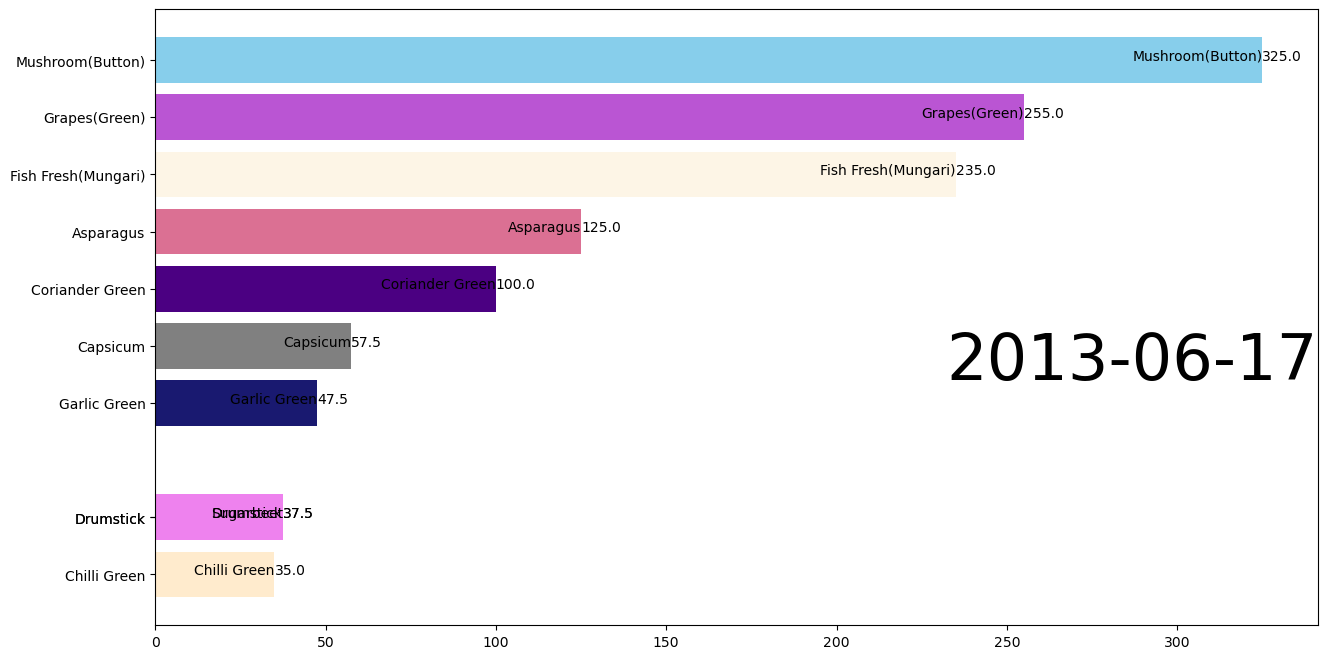

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
current_date = final_df.iloc[1].name


ax.barh(y=y_plot_steps[0],tick_label=cols,width=plot_steps[0],color=color_values)

for j in range(len(plot_steps[0])):
    ax.text(plot_steps[0][j], y_plot_steps[0][j],     cols[j],            ha='right')  
    ax.text(plot_steps[0][j], y_plot_steps[0][j],     plot_steps[0][j],           ha='left')   
    
ax.text(1, 0.4, current_date, transform=ax.transAxes, size=46, ha='right')


# Animate function

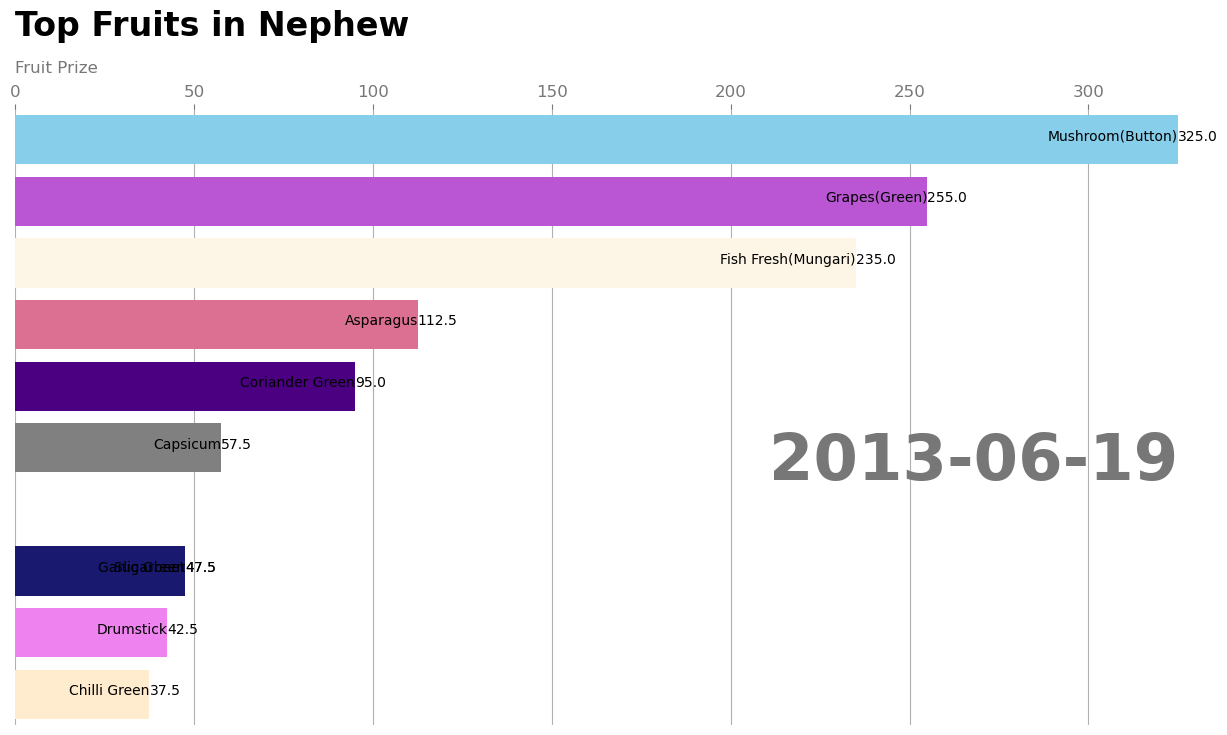

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(i):
    current_date = final_df.iloc[i//step_size].name
    ax.clear()

    ax.barh(y=y_plot_steps[i],tick_label=cols,width=plot_steps[i],color=color_values)
    for j in range(len(plot_steps[i])):
        ax.text(plot_steps[i][j], y_plot_steps[i][j],     cols[j],            ha='right')  
        ax.text(plot_steps[i][j], y_plot_steps[i][j],     plot_steps[i][j],           ha='left')  
    # Add year right middle portion of canvas
    ax.text(1, 0.4, current_date, transform=ax.transAxes,color='#777777', size=46, ha='right',weight=800)

    ax.text(0, 1.06, 'Fruit Prize', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top Fruits in Nephew',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    """ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))"""
    plt.box(False)
draw_barchart(10)


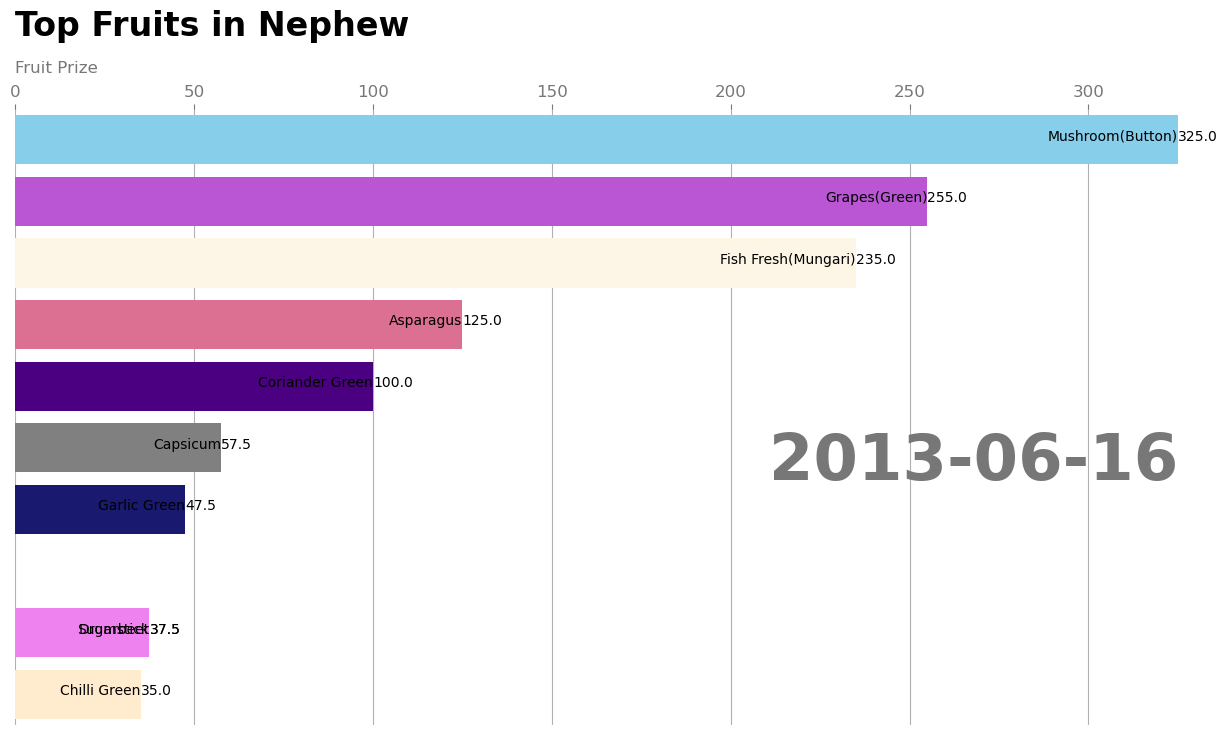

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(0, len(plot_steps)))
#HTML(animator.to_jshtml()) 

# save the file

In [24]:
animator.save(filename="./pillow_example.gif", writer="pillow")

# Key Take away
1. Pandas
    - pivot 
    - bfill, ffill, interpolation
2. Numpy
    - argsort , searchsort
    - linspace
    - append
3. Matplotlib
    - barh(y=[1,1.5,3],width=[3,4,5],color=['r','g','b'])
    - plt.subplot(figsize=(15,8))
    - ax.text
4. Matplotlib Animation

# Ref
- [https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41]
- (Neuron Nine)[https://youtu.be/IEQhZIv1Cq0?si=aihQ4khMdVKYSunt]
- https://www.kaggle.com/datasets/nischallal/kalimati-tarkari-dataset